<a href="https://colab.research.google.com/github/AshtonGlover/stock-prediction/blob/main/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

In [139]:
import pandas as pd

df = pd.read_csv('MSFT.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400
...,...,...,...,...,...,...,...
9684,2024-08-16,420.600006,421.339996,417.299988,418.470001,418.470001,22775600
9685,2024-08-19,418.959991,421.750000,416.459991,421.529999,421.529999,15234000
9686,2024-08-20,421.700012,425.859985,421.640015,424.799988,424.799988,16387600
9687,2024-08-21,424.079987,426.399994,421.720001,424.140015,424.140015,16067300


In [140]:
df = df[['Date', 'Close']]

df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9684,2024-08-16,418.470001
9685,2024-08-19,421.529999
9686,2024-08-20,424.799988
9687,2024-08-21,424.140015


In [141]:
import datetime

def strToDate(s):
  split_date = s.split('-')
  day, month, year = int(split_date[2]), int(split_date[1]), int(split_date[0])
  return datetime.datetime(year = year, month = month, day = day)

In [142]:
df['Date'] = df['Date'].apply(strToDate)
df['Date']

,Date
0,1986-03-13
1,1986-03-14
2,1986-03-17
3,1986-03-18
4,1986-03-19
...,...
9684,2024-08-16
9685,2024-08-19
9686,2024-08-20
9687,2024-08-21


In [7]:
df.index = df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2024-08-16,418.470001
2024-08-19,421.529999
2024-08-20,424.799988


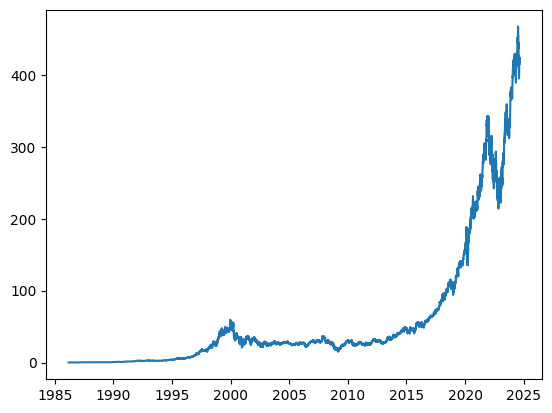

In [8]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [127]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = strToDate(first_date_str)
  last_date  = strToDate(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

windowed_df = df_to_windowed_df(df,
                                '1990-03-04',
                                '2024-08-22',
                                n=1004)
windowed_df

,Target Date,Target-1004,Target-1003,Target-1002,Target-1001,Target-1000,Target-999,Target-998,Target-997,Target-996,...,Target-9,Target-8,Target-7,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,1990-03-04,0.097222,0.100694,0.102431,0.099826,0.098090,0.095486,0.092882,0.090278,0.092014,...,0.680556,0.696181,0.667535,0.669271,0.677083,0.689236,0.680556,0.685764,0.694444,0.720486
1,1990-03-06,0.102431,0.099826,0.098090,0.095486,0.092882,0.090278,0.092014,0.094618,0.096354,...,0.667535,0.669271,0.677083,0.689236,0.680556,0.685764,0.694444,0.720486,0.730903,0.725694
2,1990-03-07,0.099826,0.098090,0.095486,0.092882,0.090278,0.092014,0.094618,0.096354,0.095486,...,0.669271,0.677083,0.689236,0.680556,0.685764,0.694444,0.720486,0.730903,0.725694,0.713542
3,1990-03-08,0.098090,0.095486,0.092882,0.090278,0.092014,0.094618,0.096354,0.095486,0.094618,...,0.677083,0.689236,0.680556,0.685764,0.694444,0.720486,0.730903,0.725694,0.713542,0.737847
4,1990-03-09,0.095486,0.092882,0.090278,0.092014,0.094618,0.096354,0.095486,0.094618,0.095486,...,0.689236,0.680556,0.685764,0.694444,0.720486,0.730903,0.725694,0.713542,0.737847,0.739583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8679,2024-08-16,209.699997,214.580002,213.020004,213.690002,216.470001,221.149994,226.580002,228.910004,225.529999,...,395.149994,399.609985,398.429993,402.690002,406.019989,406.809998,414.010010,416.859985,421.029999,418.470001
8680,2024-08-19,214.580002,213.020004,213.690002,216.470001,221.149994,226.580002,228.910004,225.529999,227.270004,...,399.609985,398.429993,402.690002,406.019989,406.809998,414.010010,416.859985,421.029999,418.470001,421.529999
8681,2024-08-20,213.020004,213.690002,216.470001,221.149994,226.580002,228.910004,225.529999,227.270004,231.649994,...,398.429993,402.690002,406.019989,406.809998,414.010010,416.859985,421.029999,418.470001,421.529999,424.799988
8682,2024-08-21,213.690002,216.470001,221.149994,226.580002,228.910004,225.529999,227.270004,231.649994,217.300003,...,402.690002,406.019989,406.809998,414.010010,416.859985,421.029999,418.470001,421.529999,424.799988,424.140015


In [121]:
def windowed_df_to_date_X_y(windowed_dataframe):
  dfasnp = windowed_dataframe.to_numpy()

  dates = dfasnp[:, 0]

  middle_matrix = dfasnp[:, 1:-1]

  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = dfasnp[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((8684,), (8684, 1004, 1), (8684,))

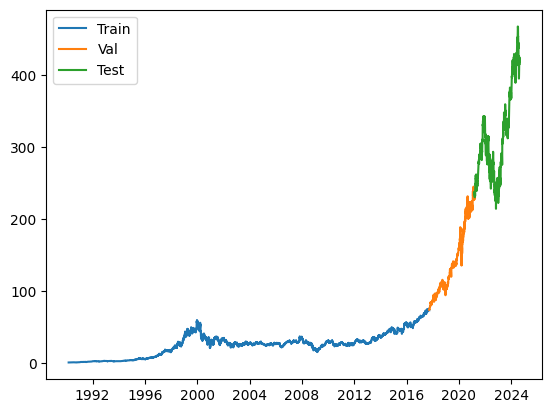

In [122]:
q_80 = int(len(dates) * 0.8)
q_90 = int(len(dates) * 0.9)

dates_train, x_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, x_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]

dates_test, x_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Val', 'Test'])

In [123]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((1004, 1)),

                    layers.LSTM(units=64, return_sequences=True),
                    layers.Dropout(0.2),

                    layers.LSTM(units=32, return_sequences=True),
                    layers.Dropout(0.2),

                    layers.Dense(units=64, activation='relu'),
                    layers.Dense(units=32, activation='relu'),
                    layers.Dense(units=16, activation='relu'),

                    layers.Dense(units=1)])

model.compile(loss='mse', optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs = 10)



Epoch 1/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 198s 886ms/step - loss: 407.4302 - mean_absolute_error: 13.1377 - val_loss: 8017.9678 - val_mean_absolute_error: 76.0663
Epoch 2/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 186s 855ms/step - loss: 9.6303 - mean_absolute_error: 2.1453 - val_loss: 7294.8057 - val_mean_absolute_error: 71.2698
Epoch 3/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 188s 861ms/step - loss: 8.3756 - mean_absolute_error: 1.9029 - val_loss: 6911.4834 - val_mean_absolute_error: 69.1687
Epoch 4/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 202s 857ms/step - loss: 4.5817 - mean_absolute_error: 1.4496 - val_loss: 6465.6870 - val_mean_absolute_error: 65.9173
Epoch 5/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 203s 863ms/step - loss: 3.1654 - mean_absolute_error: 1.2211 - val_loss: 5978.0044 - val_mean_absolute_error: 62.5195
Epoch 6/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 201s 859ms/step - loss: 2.8530 - mean_absolute_error: 1.1789 - val_loss: 5825.4121 - val_mean_absolute_error: 61.6212
Epoch 7/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 202s 860m

218/218 ━━━━━━━━━━━━━━━━━━━━ 45s 205ms/step


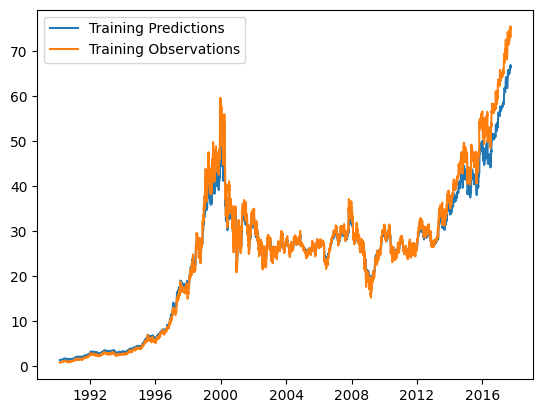

In [124]:
train_predict = model.predict(x_train).flatten()

plt.plot(dates_train, train_predict)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 196ms/step


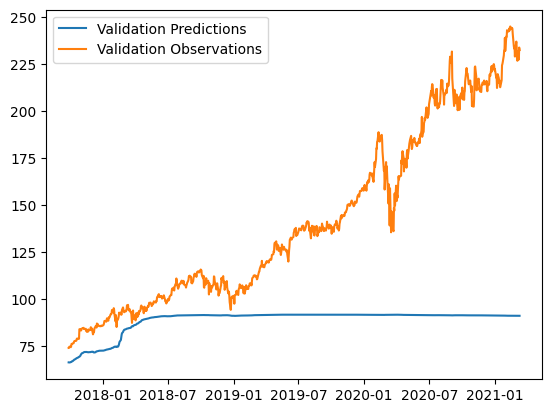

In [125]:
val_predict = model.predict(x_val).flatten()

plt.plot(dates_val, val_predict)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 220ms/step


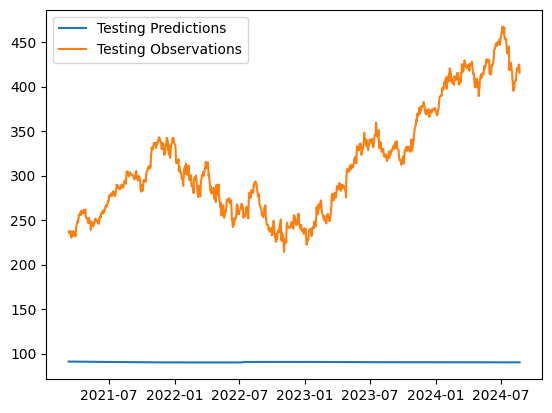

In [126]:
test_predict = model.predict(x_test).flatten()

plt.plot(dates_test, test_predict)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [ ]:
!pip install tensorflow
